## Decision Trees

In [15]:
# Load data
from sklearn.datasets import load_iris
iris = load_iris()
features, target = iris.data, iris.target

In [16]:
import pandas as pd
pd.DataFrame(features).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# DTC
from sklearn.tree import DecisionTreeClassifier as DTC

# Create classifier obj
# criterion = gini (default) or entropy
decision_tree = DTC()            

In [18]:
# train
model = decision_tree.fit(features,target)

# predict
# note it handles -ve lengths as well!
model.predict([[2,4,5,-1]])

array([0])

In [19]:
model.predict_proba([[2,4,5,-1]])

array([[1., 0., 0.]])

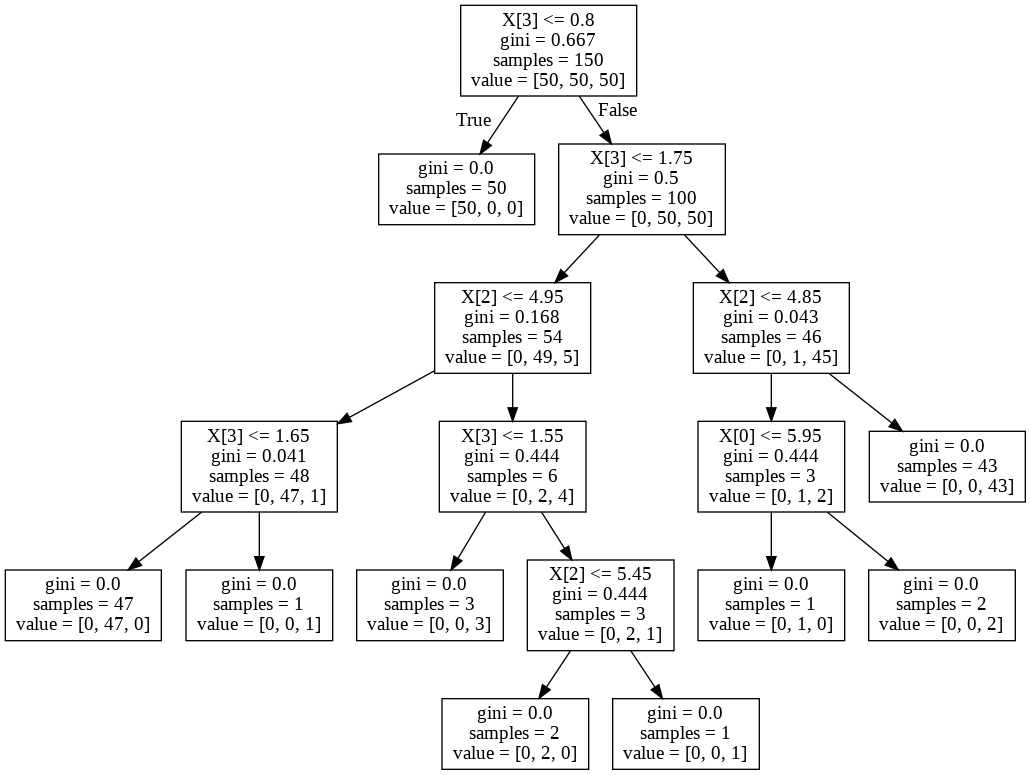

In [20]:
# Visualize how decision is made
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_lang = export_graphviz(decision_tree)
graph = pydotplus.graph_from_dot_data(dot_lang)
Image(graph.create_png())

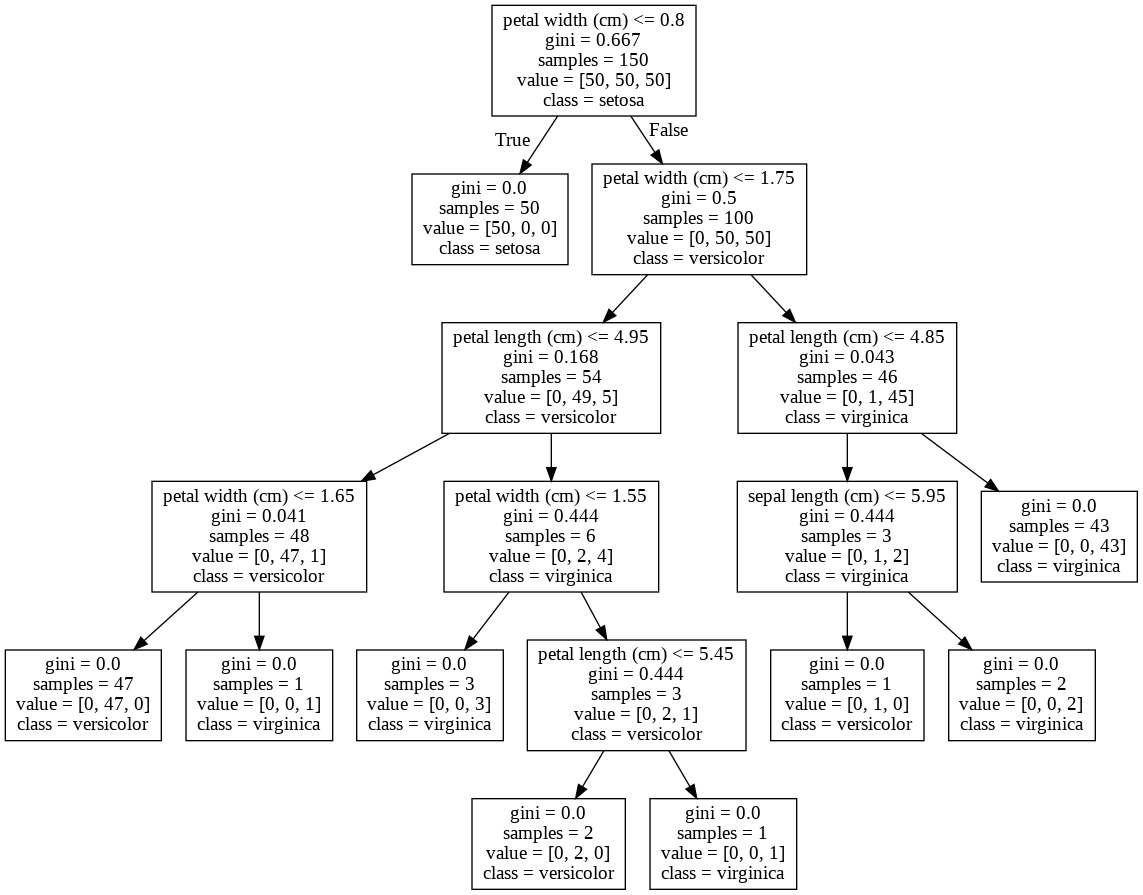

In [21]:
# create more friendly graph
dot_lang = export_graphviz(decision_tree,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_lang)
Image(graph.create_png())

In [22]:
# save figure as pdf
# check in folder icon in left side of colab
graph.write_pdf("iris.pdf")

True

In [23]:
# Visualize features as per importance
importances = model.feature_importances_
importances, importances.sum()

(array([0.01333333, 0.        , 0.06405596, 0.92261071]), 1.0)

In [24]:
features.shape

(150, 4)

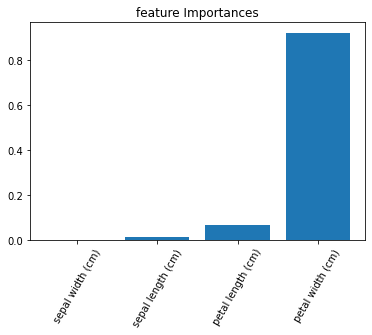

In [25]:
# sort
import numpy as np
import matplotlib.pyplot as plt

indices_of_importances = np.argsort(importances)
names = [iris.feature_names[i] for i in indices_of_importances]

plt.figure()
plt.title("feature Importances")
plt.xticks(range(features.shape[1]), names, rotation=60)
plt.bar(range(features.shape[1]), importances[indices_of_importances])
plt.show()

## Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier as ABC

# classifier obj
ada_boost = ABC()

# train
model = ada_boost.fit(features, target)

In [27]:
# predict
model.predict([[2,4,5,-1]])

array([1])

$BY Gaurav Kabra$

